In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
h1b = pd.read_csv("h1b.csv")
h1b

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


In [3]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [4]:
h1b.groupby("CASE_STATUS")[["CASE_STATUS"]].count()

,CASE_STATUS
CASE_STATUS,
CERTIFIED,2615623
CERTIFIED-WITHDRAWN,202659
DENIED,94346
INVALIDATED,1
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,15
REJECTED,2
WITHDRAWN,89799


### Checking if there exists any missing values in the dataset and Cleansing Data if true:

In [5]:
h1b.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

Since the column types are objects or strings, taking median of the objects and assigning a median value to the systems would be quite difficult. Therefore, it would be better to drop the values which have null values.

In [8]:
h1b.fillna(0, inplace=True)
h1b.replace({"Y":1, "N":0}, inplace=True)
h1b.drop_duplicates(inplace=True)

## Analysis of the dataset:

**1) Petition distributed by case statuses:**

In [10]:
h1b.groupby("CASE_STATUS")[["CASE_STATUS"]].count()

,CASE_STATUS
CASE_STATUS,
0,13
CERTIFIED,2615623
CERTIFIED-WITHDRAWN,202659
DENIED,94346
INVALIDATED,1
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,15
REJECTED,2
WITHDRAWN,89799


**2) Top Employers filing Petition:**

In [20]:
new = h1b.groupby("EMPLOYER_NAME")[["EMPLOYER_NAME", "PREVAILING_WAGE"]].agg({
    "EMPLOYER_NAME":"count",
    "PREVAILING_WAGE":"sum"
}).sort_values("PREVAILING_WAGE", ascending=False)
new

,EMPLOYER_NAME,PREVAILING_WAGE
EMPLOYER_NAME,,
INFOSYS LIMITED,130592,1.217922e+10
"GUARDIAN HEALTHCARE PROVIDERS, INC.",151,7.006582e+09
GOOGLE INC.,16473,5.060491e+09
TATA CONSULTANCY SERVICES LIMITED,64726,4.659406e+09
IBM INDIA PRIVATE LIMITED,34219,4.411472e+09
...,...,...
JONATHAN A KUIPERS PLLC,1,0.000000e+00
A,1,0.000000e+00
"MCNAMARA LEGAL SERVICES, P.A.",1,0.000000e+00


**3) Top 15 companies that filed the most visa application:**

In [29]:
h1b.groupby("EMPLOYER_NAME")[["PREVAILING_WAGE"]].count().sort_values("PREVAILING_WAGE",ascending=False).head(10)

,PREVAILING_WAGE
EMPLOYER_NAME,
INFOSYS LIMITED,130592
TATA CONSULTANCY SERVICES LIMITED,64726
WIPRO LIMITED,48117
DELOITTE CONSULTING LLP,36742
IBM INDIA PRIVATE LIMITED,34219
ACCENTURE LLP,33447
MICROSOFT CORPORATION,25576
"HCL AMERICA, INC.",22678
ERNST & YOUNG U.S. LLP,18232


**4) Top employers granting maximum prevailing wages:**

In [49]:
newh1b.groupby("EMPLOYER_NAME")[["PREVAILING_WAGE"]].sum().sort_values("PREVAILING_WAGE",ascending=False).head(10)

,PREVAILING_WAGE
EMPLOYER_NAME,
INFOSYS LIMITED,1.240253e+09
DELOITTE CONSULTING LLP,4.213266e+08
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,3.412689e+08
E AND D MEDIA INC.,3.293139e+08
BIRLASOFT INC,3.288501e+08
ERNST & YOUNG U.S. LLP,3.118976e+08
ACCENTURE LLP,2.714390e+08
CAPGEMINI AMERICA INC,2.600372e+08
"TERRALOGIC SOLUTIONS, INC.",2.596214e+08


**5) Top 20 states filing highest visa petitions:**

In [30]:
def state_name(worksite):
    l1 = worksite.split(", ")
    last_index = l1.__len__()
    return l1[last_index-1]
h1b["State"] = h1b["WORKSITE"].apply(state_name)

In [31]:
h1b

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,State
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,MICHIGAN
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,TEXAS
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,NEW JERSEY
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,COLORADO
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,MISSOURI
...,...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,0,0,0,0,0,0.0,0.0,"NYC, NEW YORK",-74.005941,40.712784,NEW YORK
3002454,3002455,0,0,0,0,0,0.0,0.0,"SOUTH LAKE, TEXAS",-97.134178,32.941236,TEXAS
3002455,3002456,0,0,0,0,0,0.0,0.0,"CLINTON, NEW JERSEY",-74.909890,40.636768,NEW JERSEY
3002456,3002457,0,0,0,0,0,0.0,0.0,"OWINGS MILL, MARYLAND",-76.780253,39.419550,MARYLAND


In [33]:
h1b.groupby("State")[["EMPLOYER_NAME"]].count().sort_values("EMPLOYER_NAME", ascending=False).head(20)

,EMPLOYER_NAME
State,
CALIFORNIA,559942
TEXAS,294455
NEW YORK,291412
NEW JERSEY,214078
ILLINOIS,160814
MASSACHUSETTS,116466
PENNSYLVANIA,109960
FLORIDA,105773
GEORGIA,103168


**6) Petition distribution by year:**

In [38]:
h1b.groupby("YEAR")[["CASE_STATUS"]].count()

,CASE_STATUS
YEAR,
0.0,13
2011.0,358767
2012.0,415607
2013.0,442114
2014.0,519427
2015.0,618727
2016.0,647803


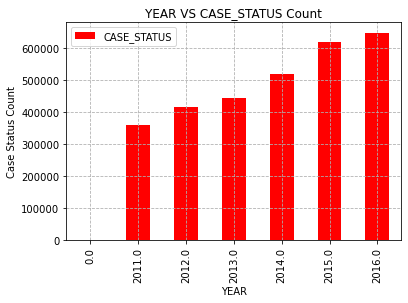

In [49]:
h1b.groupby("YEAR")[["CASE_STATUS"]].count().plot(kind="bar", color=["red"])
plt.grid(linestyle='--')
plt.xlabel("YEAR")
plt.ylabel("Case Status Count")
plt.title("YEAR VS CASE_STATUS Count")
plt.legend()
plt.show()

**7) Number of visa petitions denied:**

In [143]:
h1b.groupby("CASE_STATUS")[["CASE_STATUS"]].count()

,CASE_STATUS
CASE_STATUS,
0,13
CERTIFIED,2615623
CERTIFIED-WITHDRAWN,202659
DENIED,94346
INVALIDATED,1
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,15
REJECTED,2
WITHDRAWN,89799


In [144]:
denied_df = h1b[h1b["CASE_STATUS"]=="DENIED"]
denied_total = len(denied_df)
print(f"Total number of VISA petitions 'DENIED' = {denied_total}")

Total number of VISA petitions 'DENIED' = 94346


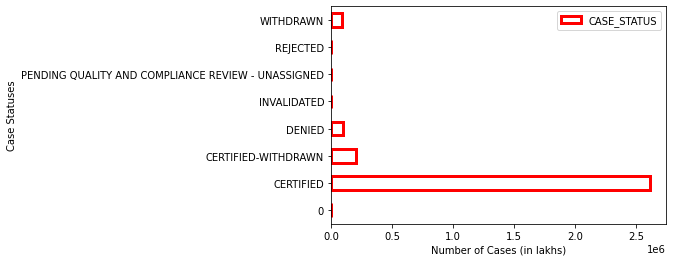

<Figure size 1440x1440 with 0 Axes>

In [84]:
h1b.groupby("CASE_STATUS")[["CASE_STATUS"]].count().plot(kind="barh", edgecolor="red", color="white", linewidth=3)
plt.xlabel("Number of Cases (in lakhs)")
plt.ylabel("Case Statuses")
plt.figure(figsize=(20,20))
plt.show()

**8) Rate of visas denied from last 5 years:**

In [96]:
def denialrate_per_year(cases, denials):
    result = (denials/cases)*100
    return result

In [194]:
rate_denied = denied_df.groupby("YEAR")[["CASE_STATUS"]].count()
rate_denied

,CASE_STATUS
YEAR,
2011.0,29130
2012.0,21096
2013.0,12126
2014.0,11896
2015.0,10923
2016.0,9175


In [195]:
def total_cases_per_year(h1b, rate_denied):
    h1b.groupby("YEAR")["CASE_STATUS"].count()
    rate_denied.insert(1,'Total_Cases', h1b.groupby("YEAR")["CASE_STATUS"].count())
    return rate_denied
total_cases_per_year(h1b, rate_denied)

,CASE_STATUS,Total_Cases
YEAR,,
2011.0,29130,358767
2012.0,21096,415607
2013.0,12126,442114
2014.0,11896,519427
2015.0,10923,618727
2016.0,9175,647803


In [196]:
rate_denied["Percentage"] = (rate_denied["CASE_STATUS"]/rate_denied["Total_Cases"])*100
rate_denied

,CASE_STATUS,Total_Cases,Percentage
YEAR,,,
2011.0,29130,358767,8.119476
2012.0,21096,415607,5.075949
2013.0,12126,442114,2.742732
2014.0,11896,519427,2.290216
2015.0,10923,618727,1.765399
2016.0,9175,647803,1.416326


Hence, these are the number of denied cases along with incoming cases and the percentage of cases which get denied every year out of the cases that are filed in the respective year.

Heres a multiple bar-graph to depict the same:

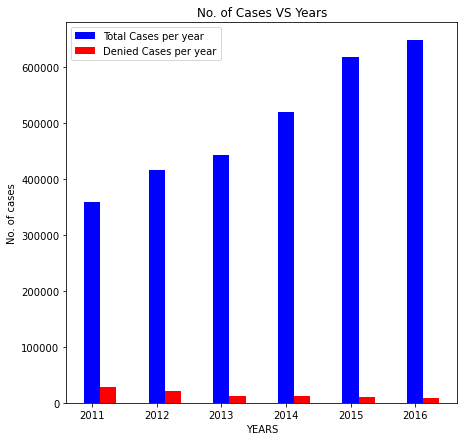

In [204]:
width = 0.25
plt.figure(figsize=(7,7))
plt.bar(rate_denied.index, rate_denied["Total_Cases"], width=width, color="blue", label = "Total Cases per year")
plt.bar(rate_denied.index+width, rate_denied["CASE_STATUS"], width=width, color="red", label="Denied Cases per year")
plt.xlabel("YEARS")
plt.ylabel("No. of cases")
plt.title("No. of Cases VS Years")
plt.legend()
plt.show()

**9) Number of visa petitions filed by states:**

In [129]:
new = h1b.groupby("State")[["CASE_STATUS"]].count().sort_values("CASE_STATUS" ,ascending=False)
new

,CASE_STATUS
State,
CALIFORNIA,559942
TEXAS,294455
NEW YORK,291412
NEW JERSEY,214078
ILLINOIS,160814
MASSACHUSETTS,116466
PENNSYLVANIA,109960
FLORIDA,105773
GEORGIA,103168


**10) Rate of denial of visa petition by the states:**

In [224]:
denied_df = h1b[h1b["CASE_STATUS"]=="DENIED"]
ratedenied_state = denied_df.groupby("State")[["CASE_STATUS"]].count()
def total_cases_per_year(h1b, rate_denied):
    h1b.groupby("State")["CASE_STATUS"].count()
    rate_denied.insert(1,'Total_Cases', h1b.groupby("State")["CASE_STATUS"].count())
    return rate_denied
total_cases_per_year(h1b, ratedenied_state)
ratedenied_state["RATE"] = (ratedenied_state["CASE_STATUS"] / ratedenied_state["Total_Cases"])*100
ratedenied_state[["RATE"]]

,RATE
State,
ALABAMA,5.091193
ALASKA,11.318052
ARIZONA,2.751225
ARKANSAS,2.255792
CALIFORNIA,3.168185
COLORADO,3.567638
CONNECTICUT,2.459555
DELAWARE,2.023376
DISTRICT OF COLUMBIA,5.205214


These are the percentages of VISA petitions which are 'DENIED' from each state with respect to the incoming petition requests per state.

**11) Top 25 job titles:**

In [244]:
h1b[["JOB_TITLE"]].value_counts().head(25)

JOB_TITLE                  
PROGRAMMER ANALYST             249038
SOFTWARE ENGINEER              121307
COMPUTER PROGRAMMER             70570
SYSTEMS ANALYST                 61965
SOFTWARE DEVELOPER              42907
BUSINESS ANALYST                39681
COMPUTER SYSTEMS ANALYST        35086
TECHNOLOGY LEAD - US            28350
SENIOR SOFTWARE ENGINEER        27133
TECHNOLOGY ANALYST - US         26055
ASSISTANT PROFESSOR             25265
SENIOR CONSULTANT               24904
CONSULTANT                      23081
PHYSICAL THERAPIST              20207
PROJECT MANAGER                 20172
DATABASE ADMINISTRATOR          16665
ACCOUNTANT                      14048
COMPUTER PROGRAMMER ANALYST     13634
RESEARCH ASSOCIATE              13623
DEVELOPER                       12909
ASSOCIATE                       12502
ANALYST                         11751
LEAD ENGINEER                   11157
COMPUTER SYSTEMS ENGINEER       11090
SENIOR SOFTWARE DEVELOPER       10208
dtype: int64

**12) Top 10 occupations with the highest wages:**

In [234]:
h1b.groupby("JOB_TITLE")[["PREVAILING_WAGE"]].sum().sort_values("PREVAILING_WAGE", ascending=False).head(10)

,PREVAILING_WAGE
JOB_TITLE,
PROGRAMMER ANALYST,3.648256e+10
SOFTWARE ENGINEER,1.844985e+10
COMPUTER PROGRAMMER,9.718198e+09
SOFTWARE DEVELOPER,8.390778e+09
BUSINESS ANALYST,7.071811e+09
SYSTEMS ANALYST,7.058909e+09
PHYSICAL THERAPISTS,7.029383e+09
COMPUTER SYSTEMS ANALYST,5.049686e+09
SENIOR SOFTWARE ENGINEER,4.000466e+09


**13) To analyse the fraction of full-time and part-time workers:**

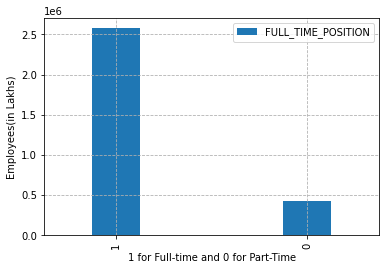

Another representation of the fraction of FULL-TIME to HALF-TIME workers is as follows:


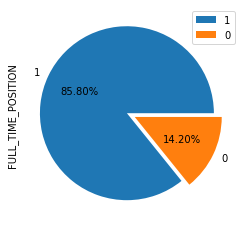

In [265]:
h1b["FULL_TIME_POSITION"].value_counts().plot(kind="bar", width=0.25)
plt.xlabel("1 for Full-time and 0 for Part-Time")
plt.ylabel("Employees(in Lakhs)")
plt.legend()
plt.grid(linestyle="--")
plt.show()
print("Another representation of the fraction of FULL-TIME to HALF-TIME workers is as follows:")
h1b["FULL_TIME_POSITION"].value_counts().plot(kind="pie", autopct="%0.2f%%", explode=[0.05,0.05])
plt.legend()
plt.show()